<a href="https://colab.research.google.com/github/VBsaini/deepLearning-ZTM/blob/main/02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro duction to Classification with TF

Classification is where you try to classify something as one or other
* Binary classification (1 or 2)
* Multiclass classification(can be more than 2 (1 or 2 or 3 or 4))
* Multilaber classification(can have more than one classification (123 or 2 or 35 or 12))

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 100 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [2]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our Data is a little hard to understand right now.... lets's visualize it

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label":y})

In [5]:
 circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


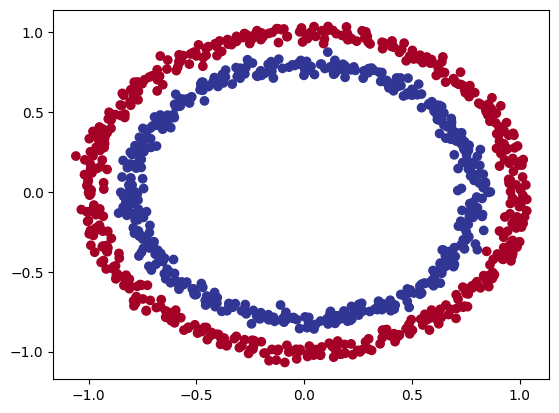

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(circles.X0, circles.X1, c=y, cmap=plt.cm.RdYlBu)
plt.show()

## Input and output shapes

In [7]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
len(X), len(y)

(1000, 1000)

In [9]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

In [10]:
import tensorflow as tf

In [11]:
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
    )

model.fit(X, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4529 - loss: 2.3908
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5085 - loss: 0.7131
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5050 - loss: 0.6971
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5072 - loss: 0.6937
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5031 - loss: 0.6934


In [12]:
model.fit(X, y, epochs=200, verbose=0)

In [13]:
model.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4852 - loss: 0.6927  


[0.6932879686355591, 0.4729999899864197]

In [14]:
# adding more layers
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
    )

model.fit(X, y, epochs=200, verbose=0)

In [15]:
model.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4955 - loss: 8.1322   


[8.059046745300293, 0.5]

In [16]:
# our current model is v bad its guessing the vals(ie 0, 1, 0, 1 ...)

# adding more layers
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
    )

model_2.fit(X, y, epochs=100, verbose=0)

In [17]:
model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5036 - loss: 0.6916  


[0.6950888633728027, 0.4880000054836273]

In [18]:
# a fucn to visualize the model's prediction with a meshgrid
import numpy as np
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predictiong on X.
  """

  # Define the axis boundaries of plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # Create X value
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # make pred
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Multiclass")
    # we have to reshape our preds to get ready
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Binary")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Binary


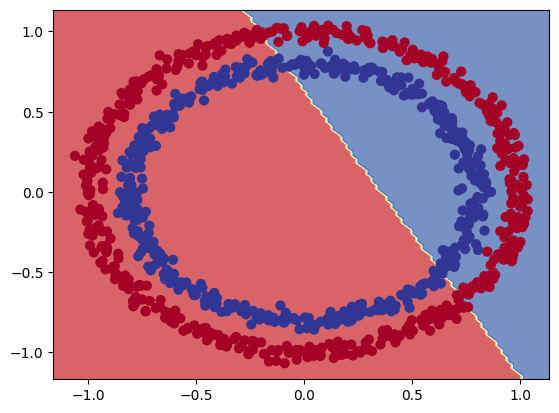

In [19]:
plot_decision_boundary(model_2, X, y)

## The missing piece: Non-linearity

In [20]:
tf.random.set_seed(42)

# model with non liearity
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_3.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4535 - loss: 5.0835
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4534 - loss: 5.0287 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4528 - loss: 5.0079 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4500 - loss: 4.9964 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4502 - loss: 4.9870 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4487 - loss: 4.9788 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4502 - loss: 4.9714 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4497 - loss: 4.9647 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4493 - loss: 4.9585 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4490 - loss: 4.9528 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4508 - loss: 4.9467
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Binary


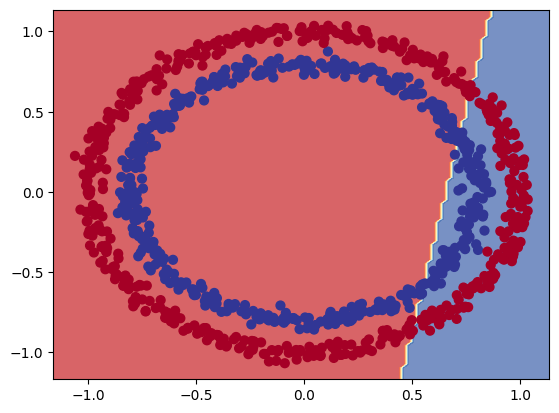

In [21]:
plot_decision_boundary(model_3, X, y)

In [22]:
tf.random.set_seed(42)

# model with non liearity
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_4.fit(X, y, epochs=100, verbose=0)

In [23]:
model_4.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4322 - loss: 0.9669  


[0.920314610004425, 0.4620000123977661]

In [24]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

model_5.fit(X, y, epochs=100, verbose=0)
model_5.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9997 - loss: 0.0428  


[0.04115942120552063, 0.9990000128746033]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Binary


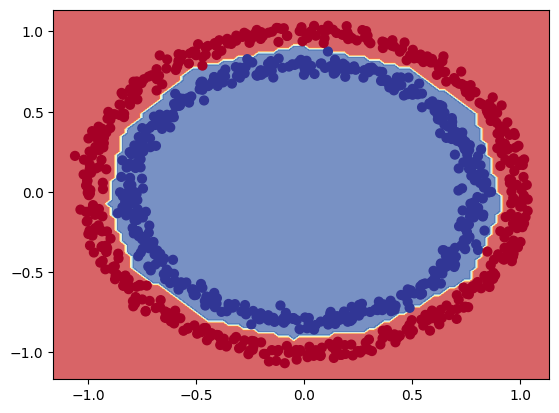

In [25]:
plot_decision_boundary(model_5, X, y)

In [26]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

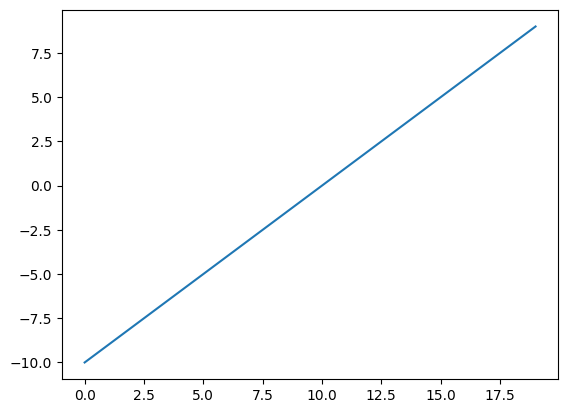

In [27]:
plt.plot(A)

In [28]:
# lets replicate sigmoid(X) = 1 / (1 + exp(-X))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

SA = sigmoid(A)

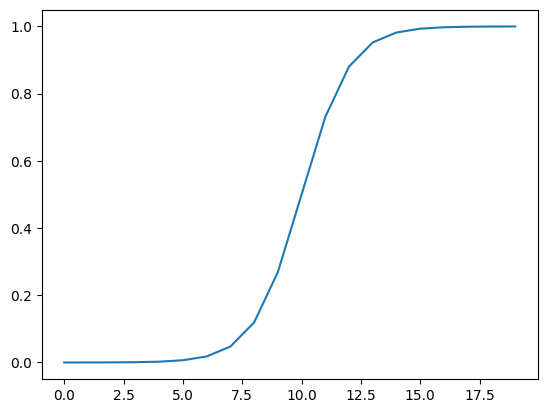

In [29]:
plt.plot(SA)

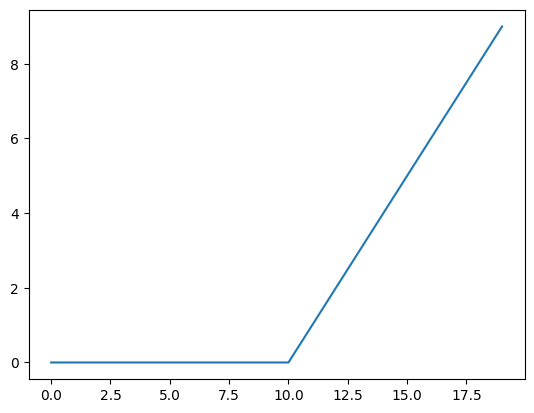

In [30]:
# lets recreate relu
def relu(X):
  return tf.maximum(X, 0)

plt.plot(relu(A))

## Evaluating and improving our classification model


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(y_train)

(800, 800)

In [32]:
tf.random.set_seed(42)

# create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# fit the model
history = model_6.fit(X_train, y_train, epochs=25, verbose=0)

In [33]:
model_6.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9914 - loss: 0.1003  


[0.1014426052570343, 0.9900000095367432]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Binary
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Binary


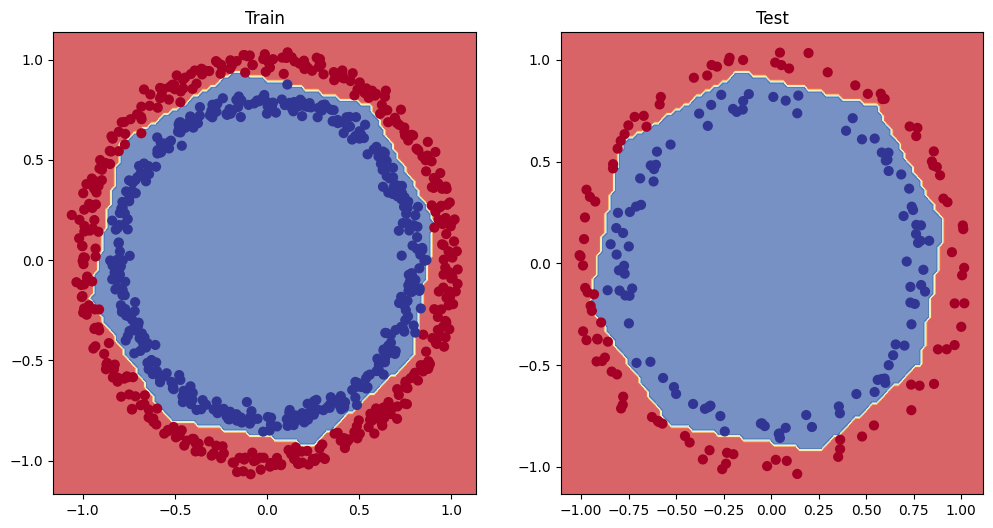

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_6, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_6, X_test, y_test)

## Plot the loss (or training) curves

In [35]:
pd.DataFrame(history.history)

,accuracy,loss
0,0.50250,0.702489
1,0.52250,0.689748
2,0.53125,0.686611
3,0.53250,0.684180
4,0.55375,0.681049
5,0.55875,0.676868
6,0.57375,0.670630
7,0.59000,0.660002
8,0.64750,0.641799
9,0.69875,0.615780


Text(0.5, 1.0, 'Model_6 loss curves')

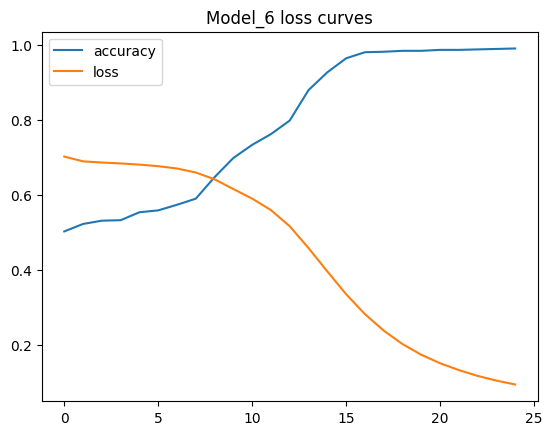

In [36]:
pd.DataFrame(history.history).plot()
plt.title("Model_6 loss curves")

## Finding the best learining rate

with learning rate **callback**

In [37]:
# set random seed
tf.random.set_seed(42)

# Create
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# Compile
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy,
                metrics=["accuracy"],
                optimizer=tf.keras.optimizers.Adam())

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20) )

# Fit (passing lr_scheduler callback)
history = model_7.fit(X_train, y_train,  epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4789 - loss: 0.7104 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4804 - loss: 0.7100 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4710 - loss: 0.7098 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4705 - loss: 0.7094 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4723 - loss: 0.7091 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4586 - loss: 0.7087 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4690 - loss: 0.7083 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4705 - loss: 0.7078 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4731 - loss: 0.7073 - learning_

<Axes: >

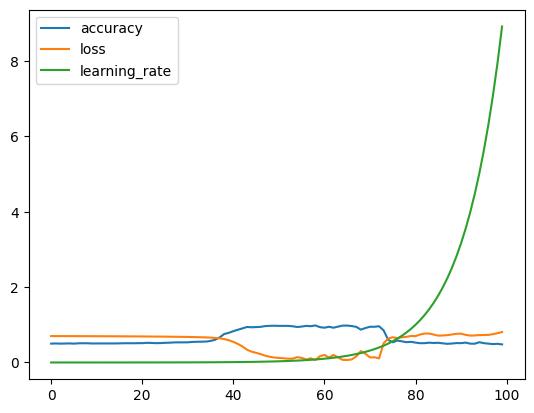

In [38]:
pd.DataFrame(history.history).plot()

Text(0.5, 1.0, 'Learning rate vs. Loss')

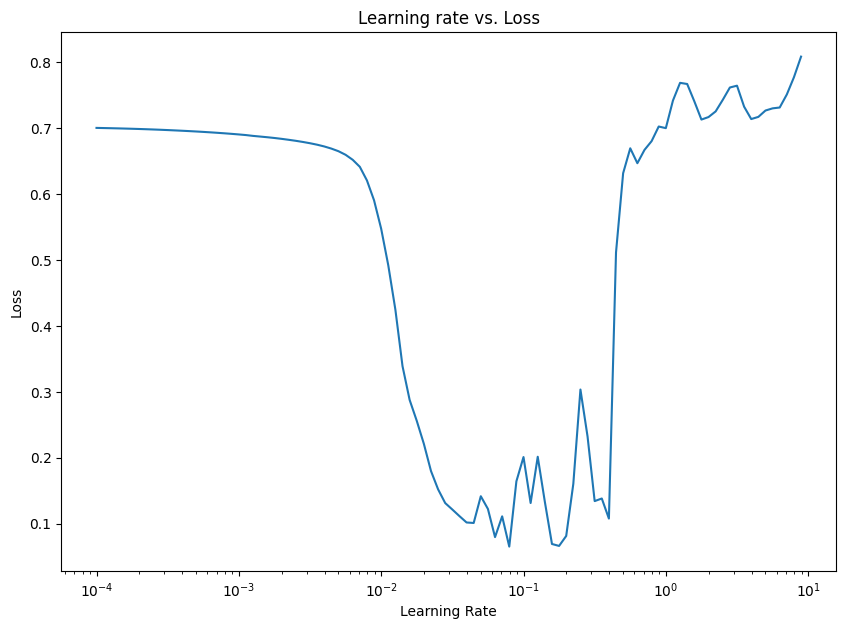

In [39]:
# Plot the learning rate vs loss
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

In [40]:
# set random seed
tf.random.set_seed(42)

# Create
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

# Compile
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy,
                metrics=["accuracy"],
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02))


# Fit (passing lr_scheduler callback)
history_8 = model_8.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5067 - loss: 0.6962
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4819 - loss: 0.6908 
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5243 - loss: 0.6877 
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5273 - loss: 0.6845 
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5385 - loss: 0.6788 
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5602 - loss: 0.6626  
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6322 - loss: 0.6395 
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6791 - loss: 0.6216 
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6984 - loss: 0.6054  
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7045 - loss: 0.5901 
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7141 - loss: 0.5754  
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Binary


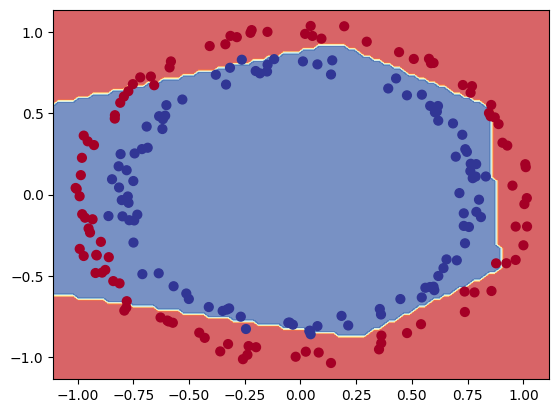

In [41]:
plot_decision_boundary(model_8, X_test, y_test)

In [42]:
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8235 - loss: 0.4199  


[0.4283260107040405, 0.8149999976158142]

## More classification evaluation methods
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from sckit-learn)

In [43]:
# We've already used accuracy in the above codes

# Confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_8.predict(X_test)

# Create confusion matrix
# confusion_matrix(y_test, y_preds)
# ValueError: Classification metrics can't handle a mix of binary and continuous targets

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [44]:
y_preds[:10], y_test[:10]

(array([[0.80295044],
        [0.80295044],
        [0.51519585],
        [0.80295044],
        [0.80295044],
        [0.16250345],
        [0.80295044],
        [0.03476137],
        [0.00283342],
        [0.39067844]], dtype=float32),
 array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0]))

Oops.... looks like our predictions array has come out in prediction prob form... the standard output from the sigmoid (or softmax) activation function

In [45]:
# Convert prediction prob to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.]], dtype=float32)>

In [46]:
confusion_matrix(y_test, tf.round(y_preds))

array([[69, 33],
       [ 4, 94]])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Binary


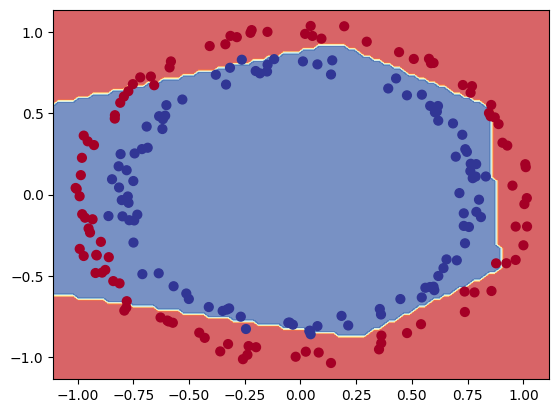

In [47]:
plot_decision_boundary(model_8, X_test, y_test)

## How about we prettify our confusion matrix?

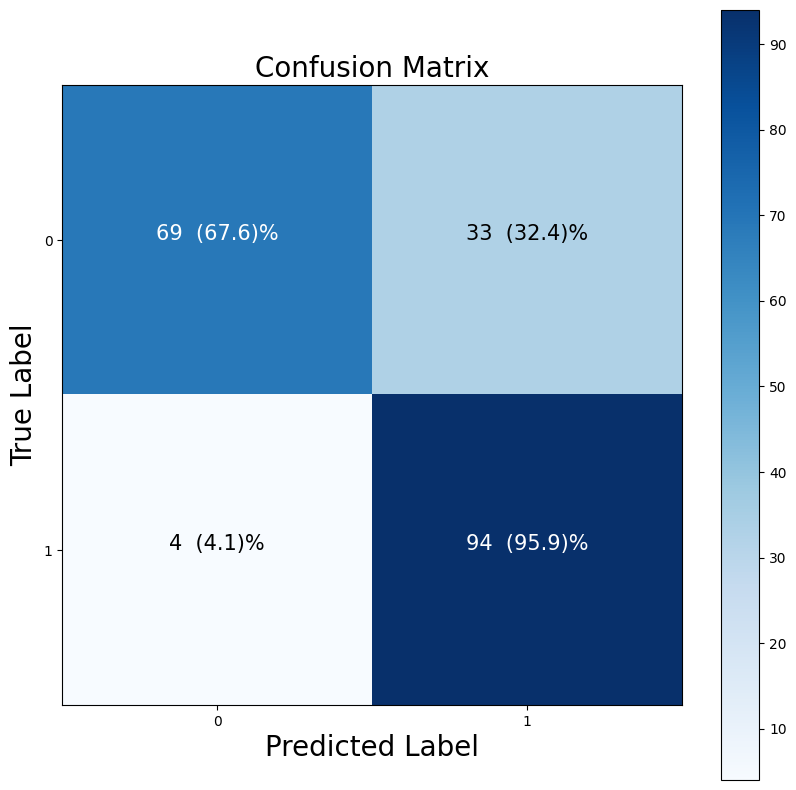

In [48]:
# the confusion matrix we are abt to make is a remix of scikit-learn's CM

import itertools

figsize=(10, 10)
# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize oru confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize = figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title= "Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels
       )

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust the label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min())/2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]}  ({cm_norm[i, j]*100:.1f})%",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15
           )

# Working with a larger example (multiclass classification)

When you have more than 2 classes as an options, its known as multi-class classification  

In [49]:
import tensorflow as tf
# from tensorflow.keras.datasets import fashion_mnist


(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [50]:
# Show the first training example
print(f"Training sample: \n {train_data[0]}\n")
print(f"Training label: \n {train_labels[0]}\n")

Training sample: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1

In [51]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

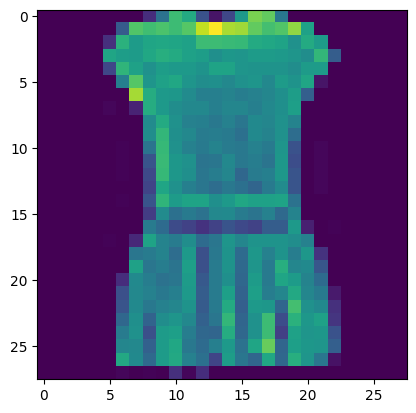

In [52]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[3])

In [53]:
# Create a small list so we can index onto our training labels so they are human readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Ankle boot')

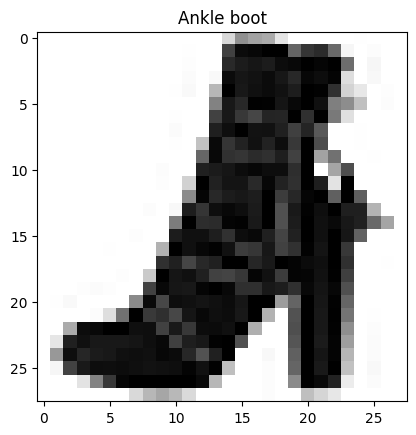

In [54]:
# Plot an example image and its label
Index = 11
plt.imshow(train_data[Index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[Index]])

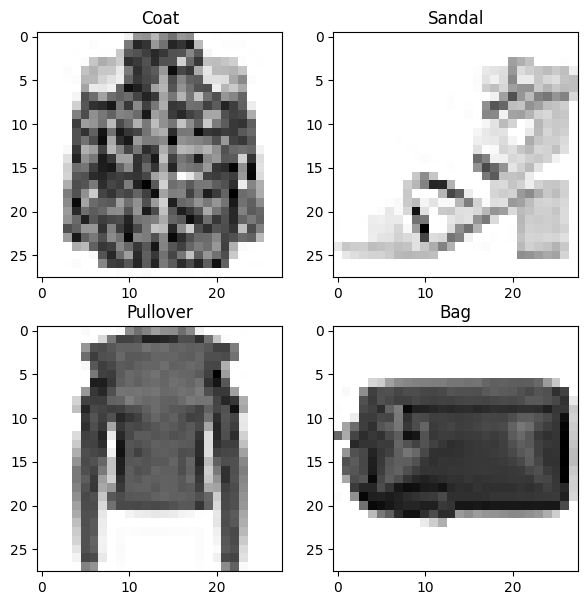

In [55]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])

## Building a multi-class classification model

In [56]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model (if labels are one_hot encoded use categorical_crossentropy if not use sparse_categorical_crossentropy)
model_10.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_10.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0993 - loss: 2.6083 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1113 - loss: 2.2750 - val_accuracy: 0.1974 - val_loss: 1.8910
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2414 - loss: 1.7928 - val_accuracy: 0.3929 - val_loss: 1.5744
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4092 - loss: 1.4903 - val_accuracy: 0.4257 - val_loss: 1.3933
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4410 - loss: 1.3453 - val_accuracy: 0.4481 - val_loss: 1.3167
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4503 - loss: 1.3024 - val_accuracy: 0.4523 - val_loss: 1.2980
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4558 - loss: 1.2829 - val_accuracy: 0.4736 - val_loss: 1.2908
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4864 - loss: 1.2378 - val_accurac

In [57]:
model_10.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [58]:
# Check the min and max val of training data
train_data.min(), train_data.max()

(0, 255)

In [59]:
# Normalization
# we can get our training and testing data b/w 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()


(0.0, 1.0)

In [60]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model (if labels are one_hot encoded use categorical_crossentropy if not use sparse_categorical_crossentropy)
model_11.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_11.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.2866 - loss: 1.8388 - val_accuracy: 0.4290 - val_loss: 1.3753
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.4330 - loss: 1.3505 - val_accuracy: 0.4620 - val_loss: 1.2990
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4821 - loss: 1.2685 - val_accuracy: 0.6237 - val_loss: 1.0666
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6259 - loss: 1.0134 - val_accuracy: 0.6709 - val_loss: 0.9637
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6631 - loss: 0.9279 - val_accuracy: 0.7044 - val_loss: 0.8995
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6993 - loss: 0.8676 - val_accuracy: 0.7110 - val_loss: 0.8505
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7136 - loss: 0.8244 - val_accuracy: 0.7202 - val_loss: 0.8203
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7216 - loss: 0.7949 - 

<Axes: >

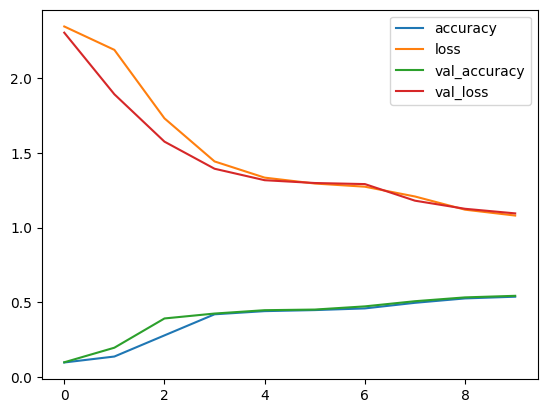

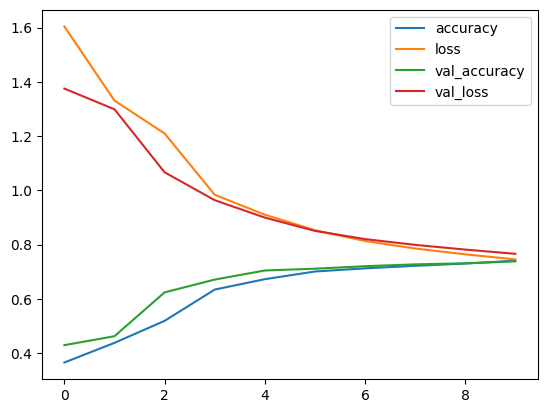

In [61]:
pd.DataFrame(non_norm_history.history).plot()
pd.DataFrame(norm_history.history).plot()

## Finding the ideal learning rate

In [62]:
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learining rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
history_12 = model_12.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_norm, test_labels), callbacks=[lr_scheduler])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4358 - loss: 1.5046 - val_accuracy: 0.6251 - val_loss: 0.9704 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6596 - loss: 0.8966 - val_accuracy: 0.7045 - val_loss: 0.8080 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7236 - loss: 0.7537 - val_accuracy: 0.7382 - val_loss: 0.7310 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7579 - loss: 0.6877 - val_accuracy: 0.7501 - val_loss: 0.7091 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7691 - loss: 0.6566 - val_accuracy: 0.7589 - val_loss: 0.6882 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7750 - loss: 0.6386 - val_accuracy: 0.7633 - val_loss: 0.6807 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7779 - l

Text(0.5, 1.0, 'Finding Ideal Learning Rate')

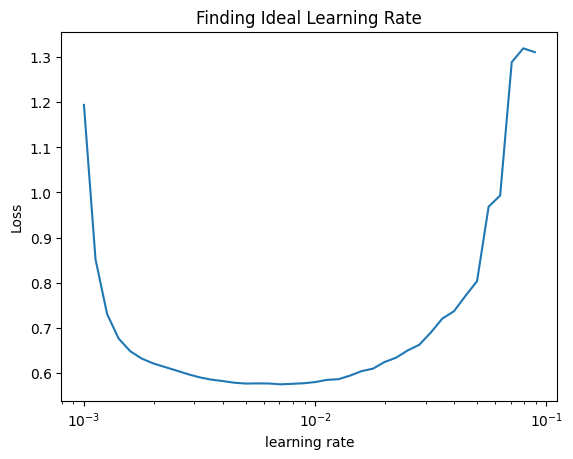

In [63]:
# Plot the learinig rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, history_12.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("Loss")
plt.title("Finding Ideal Learning Rate")

In [64]:
10**-3 # ideal learning rate of Adam

0.001

In [65]:
# Let's refit a mdoel with the ideal learning rate
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
history_13 = model_13.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2955 - loss: 1.7869 - val_accuracy: 0.5573 - val_loss: 1.0769
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5807 - loss: 1.0185 - val_accuracy: 0.6743 - val_loss: 0.8876
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6864 - loss: 0.8545 - val_accuracy: 0.7391 - val_loss: 0.7758
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7451 - loss: 0.7402 - val_accuracy: 0.7568 - val_loss: 0.7268
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7581 - loss: 0.6969 - val_accuracy: 0.7624 - val_loss: 0.7057
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7638 - loss: 0.6748 - val_accuracy: 0.7676 - val_loss: 0.6913
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7669 - loss: 0.6606 - val_accuracy: 0.7710 - val_loss: 0.6818
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7698 - loss: 0.6503 - 

## Evaluating our multi-class classification model

In [66]:
# creating our confusion model

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize oru confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize = figsize)

  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title= "Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels
        )

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust the label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min())/2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]}  ({cm_norm[i, j]*100:.1f})%",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size
            )

In [67]:
# Make some predictions with our model
y_probs = model_13.predict(test_data_norm) # probs short for "prediction probabilities"

# View the first 5 preds
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[3.4987304e-09, 4.2755938e-10, 1.8177639e-32, 1.5731416e-12,
        1.1402034e-25, 2.8213331e-01, 5.6403369e-15, 9.8664954e-02,
        1.7799959e-03, 6.1742175e-01],
       [4.3775617e-05, 3.9472916e-16, 9.3658501e-01, 6.2838561e-09,
        4.8682686e-02, 1.9150428e-09, 1.4686640e-02, 8.2450429e-26,
        1.8918579e-06, 1.2700962e-22],
       [1.2136085e-02, 9.7370386e-01, 6.2179874e-06, 1.1033325e-02,
        4.6729198e-07, 5.5280147e-04, 2.9542355e-04, 2.2090306e-03,
        9.9267681e-06, 5.2824573e-05],
       [1.2136085e-02, 9.7370386e-01, 6.2179874e-06, 1.1033325e-02,
        4.6729198e-07, 5.5280147e-04, 2.9542355e-04, 2.2090306e-03,
        9.9267681e-06, 5.2824573e-05],
       [1.4138442e-01, 5.7192170e-05, 3.9086124e-01, 1.9758424e-02,
        6.1516941e-02, 3.6061948e-04, 3.8409281e-01, 3.9872436e-10,
        1.9683645e-03, 3.3863785e-09]], dtype=float32)

In [68]:
# Convert all of the probs to preds
y_preds = y_probs.argmax(axis=1)

# View the first 10 preds
y_preds[:10]

array([9, 2, 1, 1, 2, 1, 2, 6, 5, 7])

In [69]:
model_13.evaluate(test_data_norm, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7769 - loss: 0.6234


[0.6411049365997314, 0.7728000283241272]

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[764,   9,  43,  72,   4,   1,  97,   0,  10,   0],
       [ 16, 934,   2,  38,   1,   0,   9,   0,   0,   0],
       [ 27,   1, 727,  17, 102,   0, 126,   0,   0,   0],
       [ 44,  27,  14, 780,   8,   0, 120,   0,   6,   1],
       [  3,   0, 216,  34, 566,   0, 168,   0,  13,   0],
       [  1,   0,   0,   1,   0, 906,   0,  50,   7,  35],
       [165,   1, 175,  60, 251,   0, 335,   0,  13,   0],
       [  0,   0,   0,   0,   0,  56,   0, 906,   0,  38],
       [  4,   0,  10,  17,  32,  22,  21,   3, 888,   3],
       [  0,   0,   0,   0,   1,  19,   0,  52,   6, 922]])

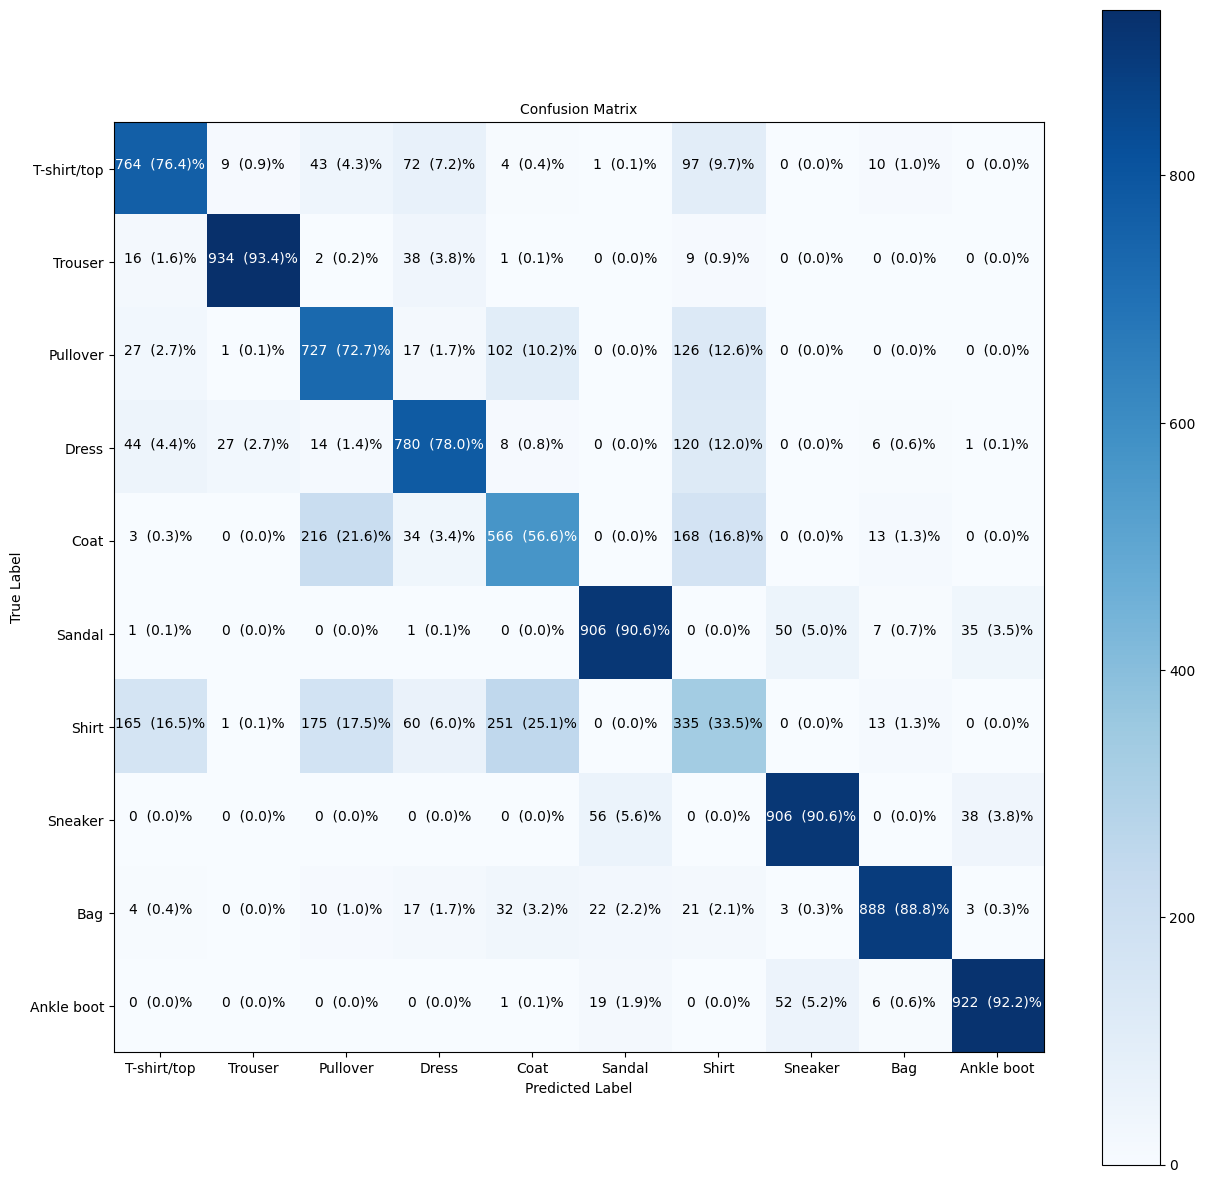

In [71]:
make_confusion_matrix(y_true=test_labels, classes=class_names, y_pred=y_preds, figsize=(15, 15), text_size=10)

In [89]:
import random

def plot_random_image(model, images, true_labels, classes):
   """
   Picks a random image, plots it and labels it with a prediction and truth label.
   """
   # Set up random integer
   i = random.randint(0, len(images))

   # Create prediction and targets
   target_image = images[i]
   pred_probs = model.predict(target_image.reshape(1, 28, 28))
   pred_label=classes[pred_probs.argmax()]
   true_label = classes[true_labels[i]]

   # Plot the image
   plt.imshow(target_image, cmap=plt.cm.binary)

   # Change the color of the titles depending on if the prediction is right or wrong
   if pred_label == true_label:
    color = "green"
   else:
    color = "red"

   # Add xlabel information (prediction/true label)
   plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label,),
              color=color) # set the color

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


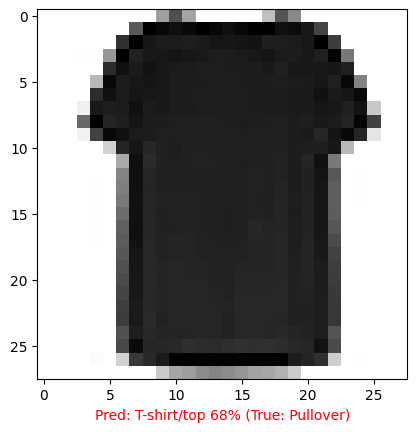

In [96]:
plot_random_image(model=model_13,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns our model is learning

In [99]:
# Find the layers of our most recent model
model_13.layers

[<Flatten name=flatten_3, built=True>,
 <Dense name=dense_29, built=True>,
 <Dense name=dense_30, built=True>,
 <Dense name=dense_31, built=True>]

In [100]:
# Extract a particular layer
model_13.layers[1]

<Dense name=dense_29, built=True>

In [101]:
# Get the patterns of a layer in our network
weights, biases = model_13.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-0.13187924, -0.07071752, -0.00737295,  0.19157557],
        [ 0.14251232,  0.06435312,  0.7674353 , -0.7850252 ],
        [ 1.2963182 , -0.06029636,  0.53132844, -1.3163462 ],
        ...,
        [ 0.20499113,  0.02711802,  0.01729268, -0.18665333],
        [ 0.05054144, -0.00226086, -0.23800415,  0.14919819],
        [-0.3084778 , -0.04928223, -1.4376816 ,  0.46578667]],
       dtype=float32),
 (784, 4))

Now let's check out the bias vector...

In [103]:
# Bias and biases shapes
biases, biases.shape

(array([ 2.4656367 , -0.05634039,  3.3036394 ,  2.5020356 ], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weights matrix.

The bias vector get intitalized as zeros (at least in the case of a TensorFlow Dense layer)

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

In [104]:
model_13.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

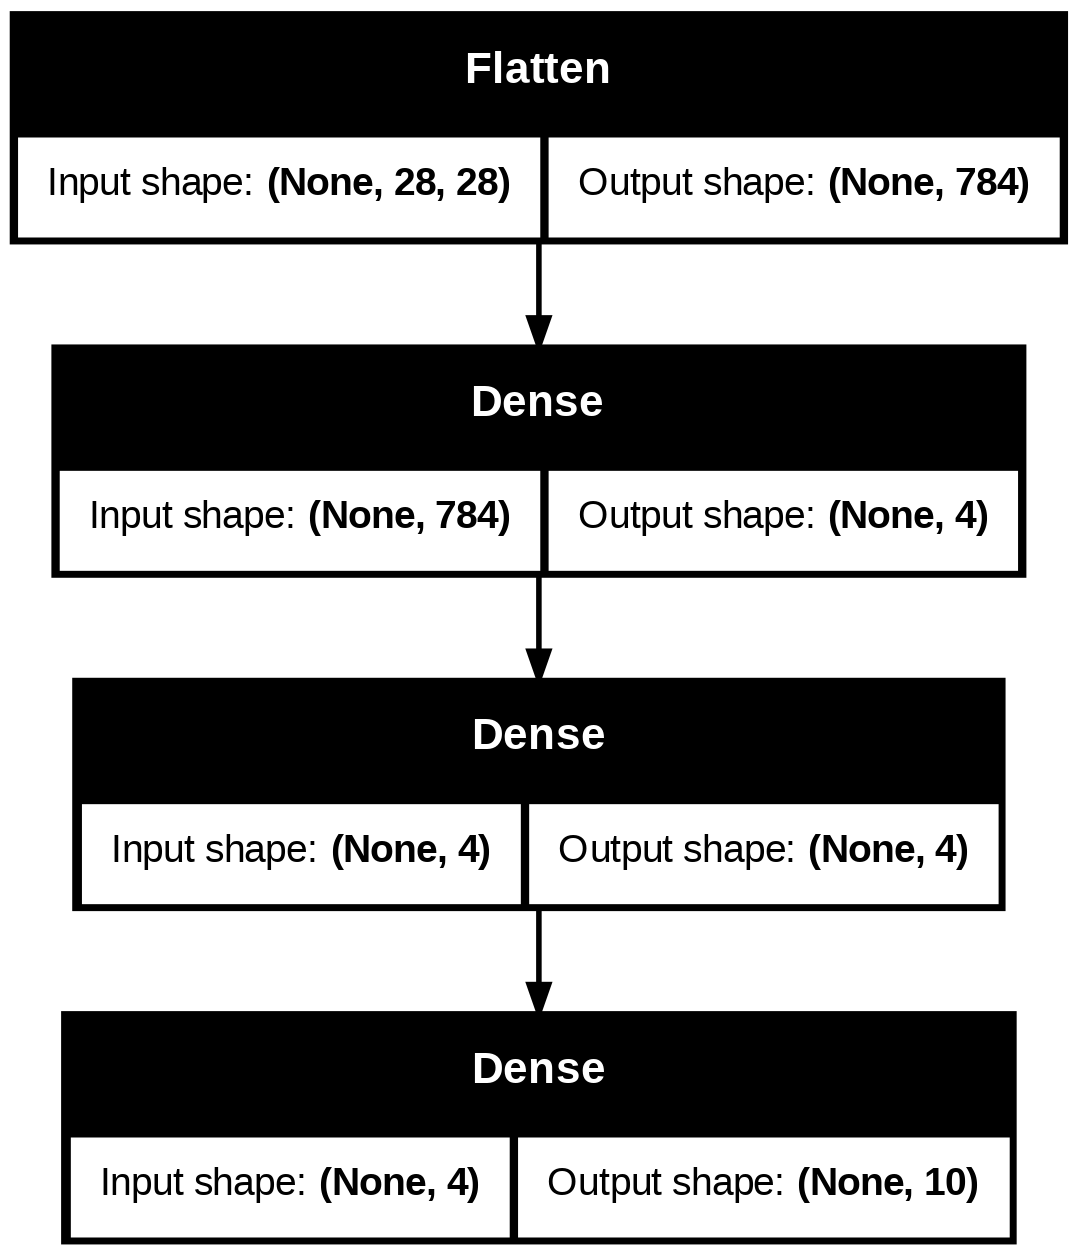

In [106]:
# another way of veiwing our dl models
from tensorflow.keras.utils import plot_model
plot_model(model_13, show_shapes=True)